In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
# Assuming the data is saved as 'bus_data.csv'
data = pd.read_csv('bus_eta_dataset.csv')

# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract hour from timestamp
data['hour'] = data['timestamp'].dt.hour

=== Basic Data Information ===
Dataset Shape: (100000, 18)

Data Types:
timestamp                datetime64[ns]
bus_id                           object
route_id                         object
stop_sequence                     int64
current_stop_name                object
next_stop_name                   object
day_of_week                       int64
is_holiday                         bool
is_peak_hour                       bool
weather_condition                object
passenger_count                   int64
current_speed                   float64
traffic_condition                object
distance_to_next_stop           float64
current_lat                     float64
current_lon                     float64
eta_minutes                       int64
hour                              int32
dtype: object

Missing Values:
timestamp                0
bus_id                   0
route_id                 0
stop_sequence            0
current_stop_name        0
next_stop_name           0
day_of_week    

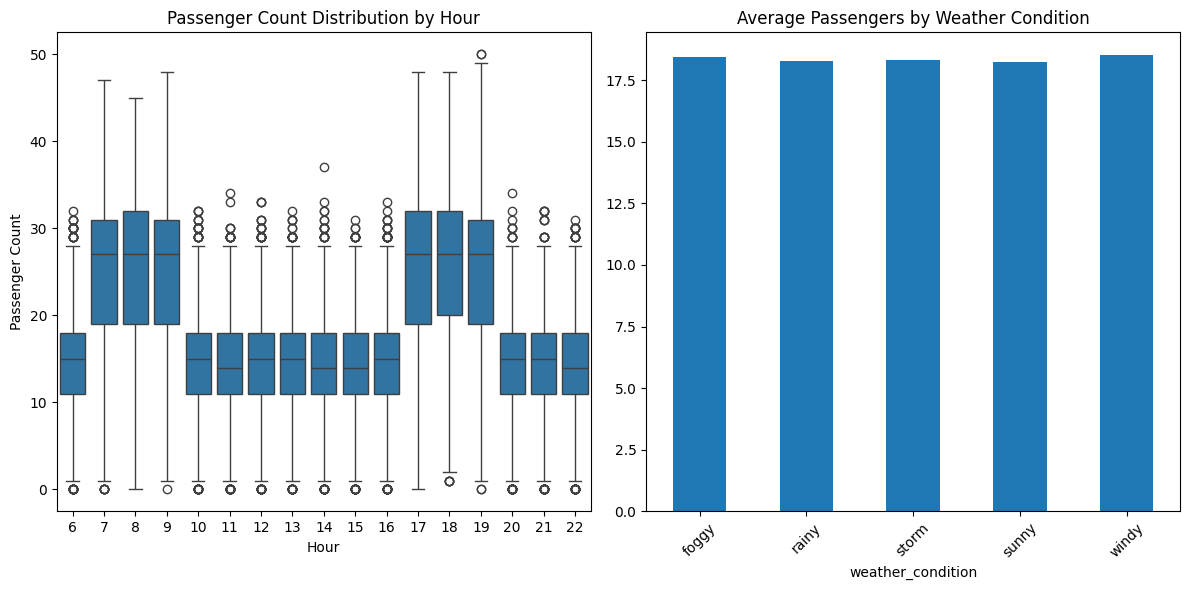


=== Traffic Analysis ===


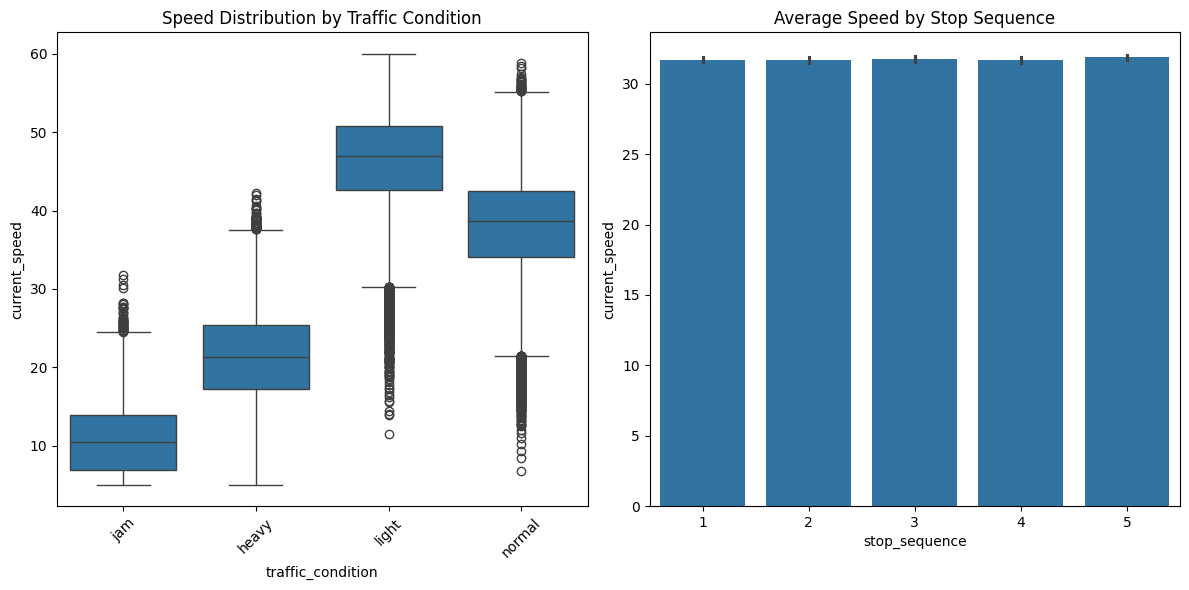


=== Weather Impact Analysis ===


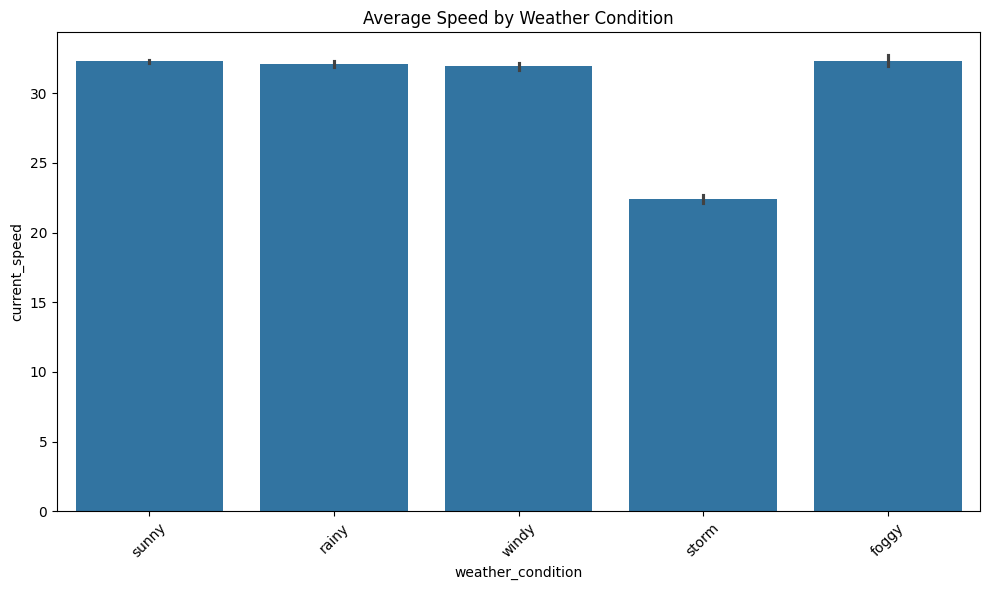


=== Route Analysis ===

Route Analysis:
               distance_to_next_stop  eta_minutes  passenger_count
stop_sequence                                                     
1                               0.39         1.11            18.32
2                               0.24         0.56            18.29
3                               0.47         1.37            18.33
4                               0.27         0.68            18.31
5                               0.53         1.59            18.27

=== Correlation Analysis ===


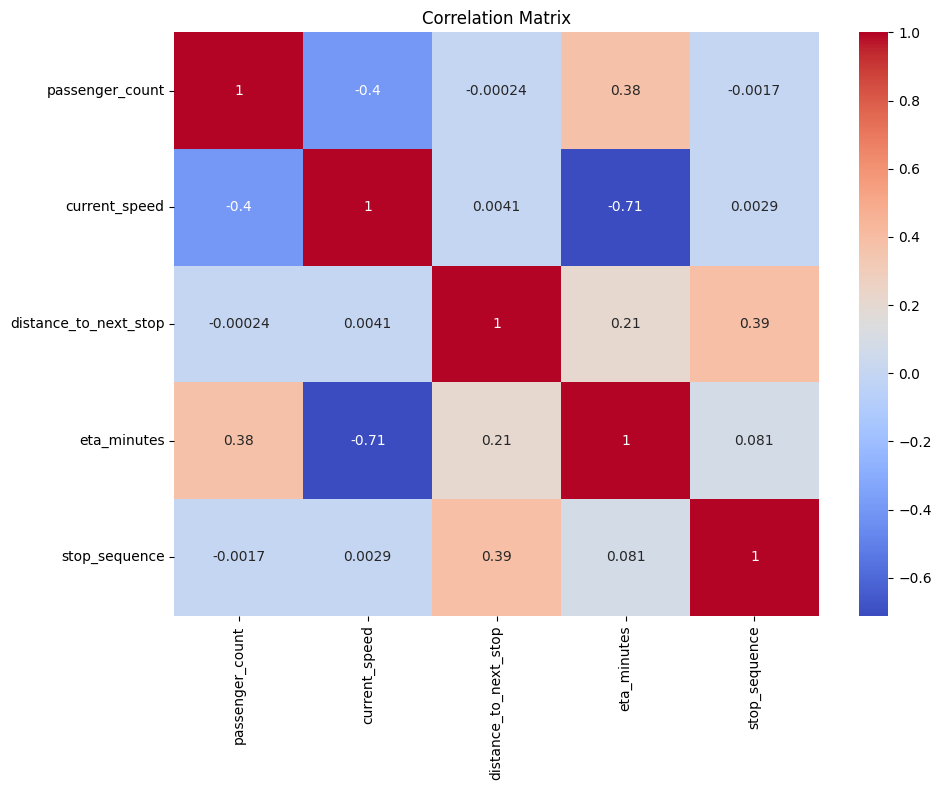

In [2]:

# Basic data exploration
def explore_basic_info():
    print("Dataset Shape:", data.shape)
    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nBasic Statistics:")
    print(data.describe())

# Passenger analysis
def analyze_passengers():
    plt.figure(figsize=(12, 6))
    
    # Passenger count by hour
    plt.subplot(1, 2, 1)
    sns.boxplot(x='hour', y='passenger_count', data=data)
    plt.title('Passenger Count Distribution by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Passenger Count')
    
    # Average passengers by weather
    plt.subplot(1, 2, 2)
    data.groupby('weather_condition')['passenger_count'].mean().plot(kind='bar')
    plt.title('Average Passengers by Weather Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Speed and traffic analysis
def analyze_traffic():
    plt.figure(figsize=(12, 6))
    
    # Speed by traffic condition
    plt.subplot(1, 2, 1)
    sns.boxplot(x='traffic_condition', y='current_speed', data=data)
    plt.title('Speed Distribution by Traffic Condition')
    plt.xticks(rotation=45)
    
    # Average speed by stop sequence
    plt.subplot(1, 2, 2)
    sns.barplot(x='stop_sequence', y='current_speed', data=data)
    plt.title('Average Speed by Stop Sequence')
    plt.tight_layout()
    plt.show()

# Weather impact analysis
def analyze_weather_impact():
    plt.figure(figsize=(10, 6))
    
    # Average speed by weather
    sns.barplot(x='weather_condition', y='current_speed', data=data)
    plt.title('Average Speed by Weather Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Route analysis
def analyze_route():
    # Calculate average time between stops
    route_analysis = data.groupby('stop_sequence').agg({
        'distance_to_next_stop': 'mean',
        'eta_minutes': 'mean',
        'passenger_count': 'mean'
    }).round(2)
    
    print("\nRoute Analysis:")
    print(route_analysis)

# Correlation analysis
def analyze_correlations():
    # Select numerical columns
    numerical_cols = ['passenger_count', 'current_speed', 'distance_to_next_stop', 
                     'eta_minutes', 'stop_sequence']
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Execute all analyses
if __name__ == "__main__":
    print("=== Basic Data Information ===")
    explore_basic_info()
    
    print("\n=== Passenger Analysis ===")
    analyze_passengers()
    
    print("\n=== Traffic Analysis ===")
    analyze_traffic()
    
    print("\n=== Weather Impact Analysis ===")
    analyze_weather_impact()
    
    print("\n=== Route Analysis ===")
    analyze_route()
    
    print("\n=== Correlation Analysis ===")
    analyze_correlations()

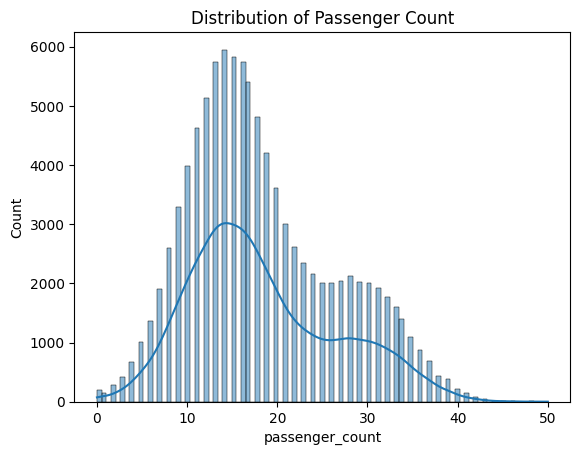

In [3]:
# Distribution of passenger count
sns.histplot(data['passenger_count'], kde=True)
plt.title("Distribution of Passenger Count")
plt.show()

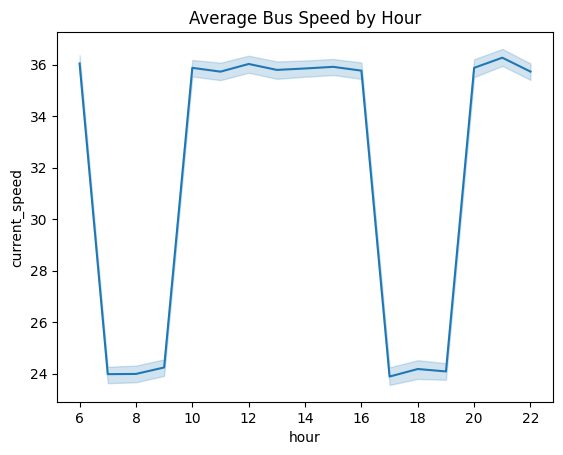

In [4]:
# Time-based trends: Bus speed over time
data['hour'] = data['timestamp'].dt.hour
sns.lineplot(x='hour', y='current_speed', data=data)
plt.title("Average Bus Speed by Hour")
plt.show()

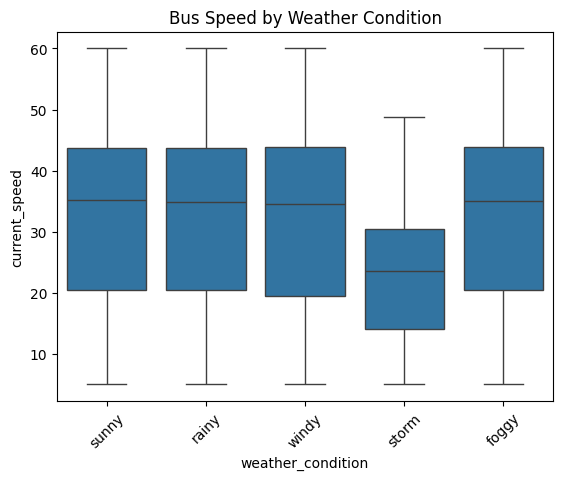

In [5]:
# Weather vs speed
sns.boxplot(x='weather_condition', y='current_speed', data=data)
plt.title("Bus Speed by Weather Condition")
plt.xticks(rotation=45)
plt.show()


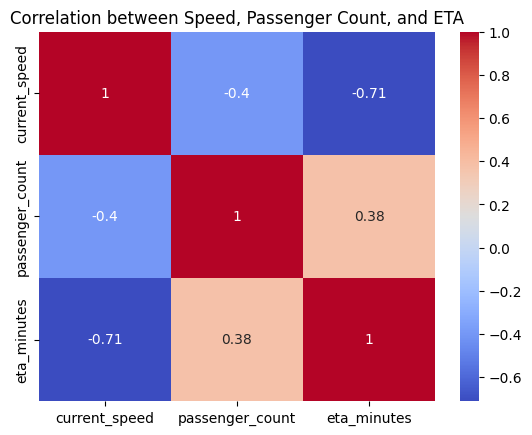

In [6]:
# Correlation heatmap
corr_matrix = data[['current_speed', 'passenger_count', 'eta_minutes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Speed, Passenger Count, and ETA")
plt.show()

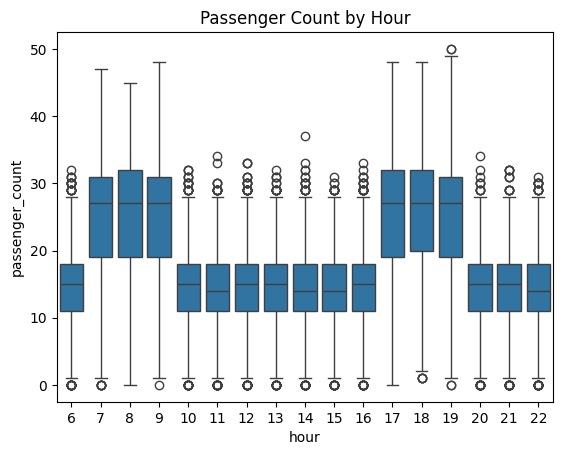

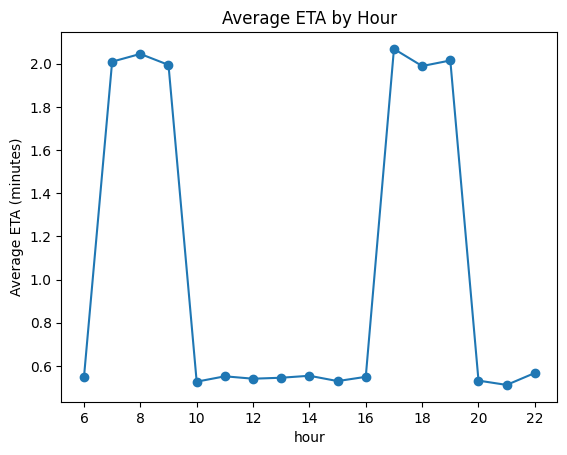

In [7]:
# Passenger count by hour
sns.boxplot(x='hour', y='passenger_count', data=data)
plt.title("Passenger Count by Hour")
plt.show()

# Average ETA by hour
avg_eta_by_hour = data.groupby('hour')['eta_minutes'].mean()
avg_eta_by_hour.plot(kind='line', marker='o', title="Average ETA by Hour")
plt.ylabel("Average ETA (minutes)")
plt.show()


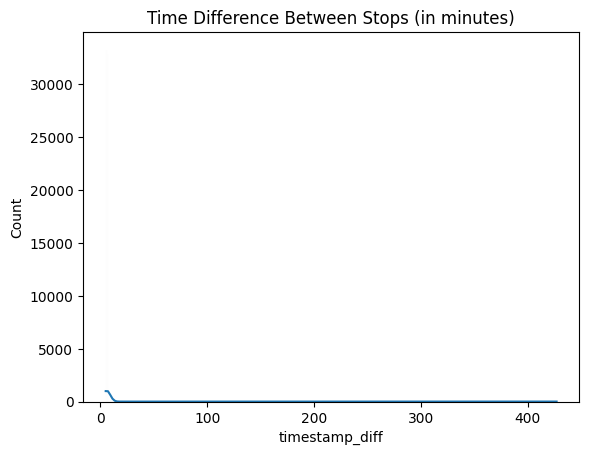

In [8]:
# Time difference between stops (in minutes)
data['timestamp_diff'] = data['timestamp'].diff().dt.total_seconds() / 60
sns.histplot(data['timestamp_diff'], kde=True)
plt.title("Time Difference Between Stops (in minutes)")
plt.show()


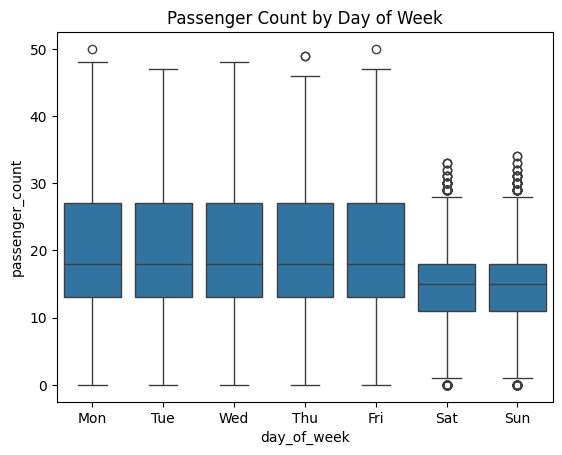

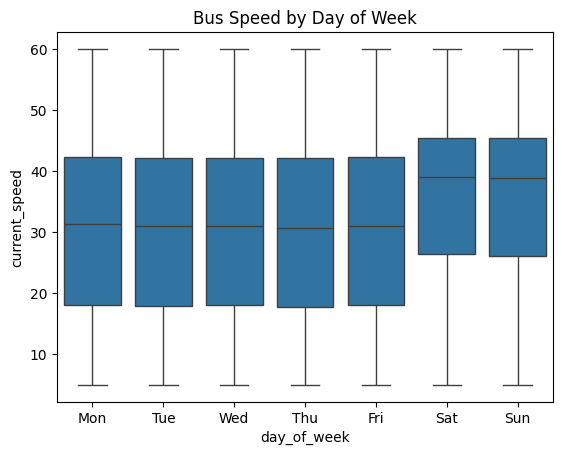

In [9]:
# Extract day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Day of week vs. passenger count
sns.boxplot(x='day_of_week', y='passenger_count', data=data)
plt.title("Passenger Count by Day of Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Day of week vs. speed
sns.boxplot(x='day_of_week', y='current_speed', data=data)
plt.title("Bus Speed by Day of Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


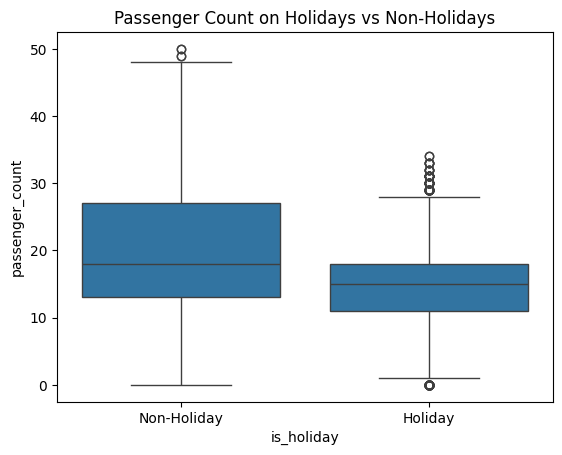

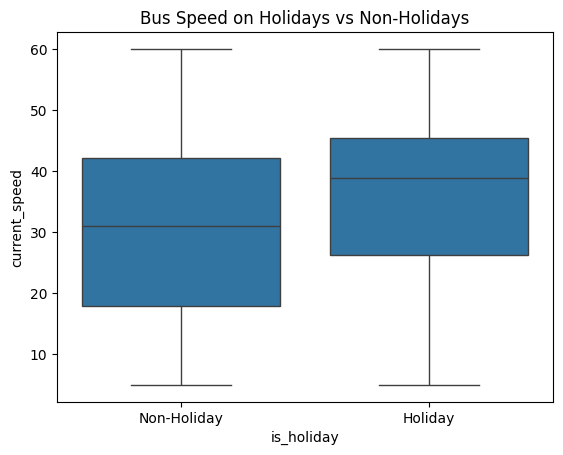

In [10]:
# Holiday vs non-holiday comparison of passenger count
sns.boxplot(x='is_holiday', y='passenger_count', data=data)
plt.title("Passenger Count on Holidays vs Non-Holidays")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# Holiday vs non-holiday comparison of bus speed
sns.boxplot(x='is_holiday', y='current_speed', data=data)
plt.title("Bus Speed on Holidays vs Non-Holidays")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


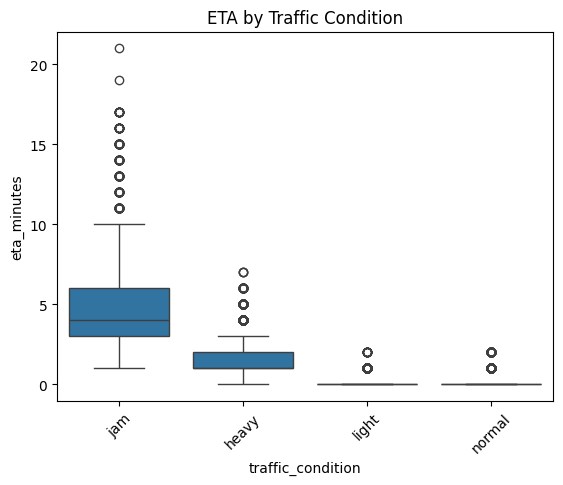

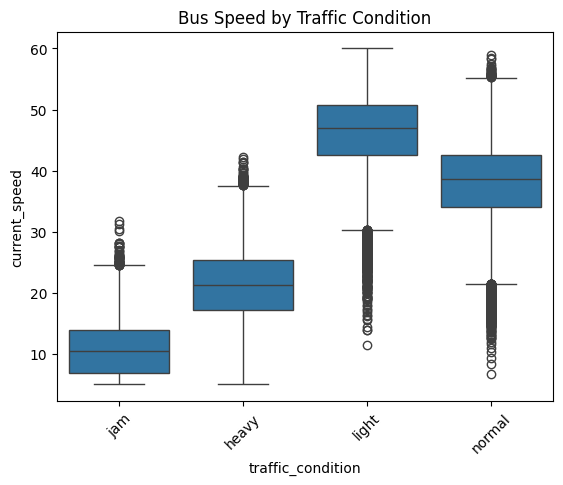

In [11]:
# Traffic condition vs. ETA
sns.boxplot(x='traffic_condition', y='eta_minutes', data=data)
plt.title("ETA by Traffic Condition")
plt.xticks(rotation=45)
plt.show()

# Traffic condition vs. bus speed
sns.boxplot(x='traffic_condition', y='current_speed', data=data)
plt.title("Bus Speed by Traffic Condition")
plt.xticks(rotation=45)
plt.show()


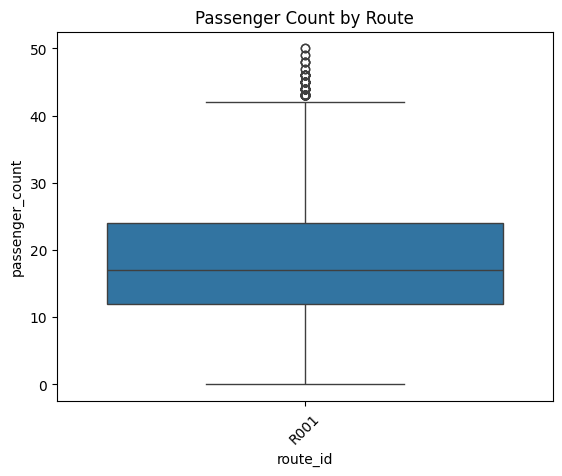

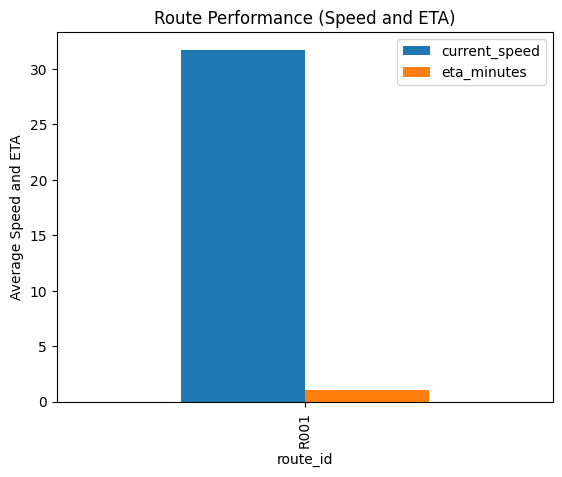

In [12]:
# Route vs. passenger count
sns.boxplot(x='route_id', y='passenger_count', data=data)
plt.title("Passenger Count by Route")
plt.xticks(rotation=45)
plt.show()

# Average speed and ETA by route
route_performance = data.groupby('route_id')[['current_speed', 'eta_minutes']].mean()
route_performance.plot(kind='bar', title="Route Performance (Speed and ETA)")
plt.ylabel("Average Speed and ETA")
plt.show()


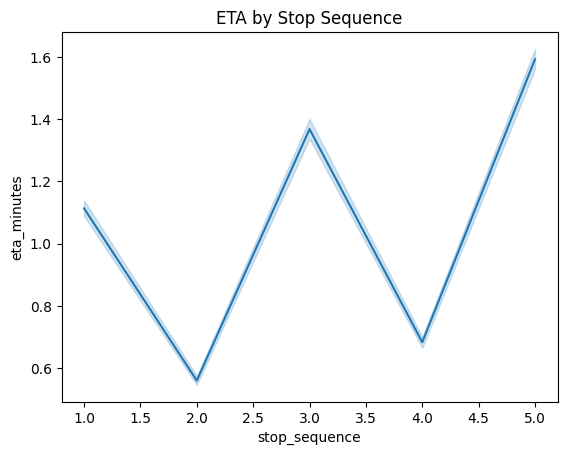

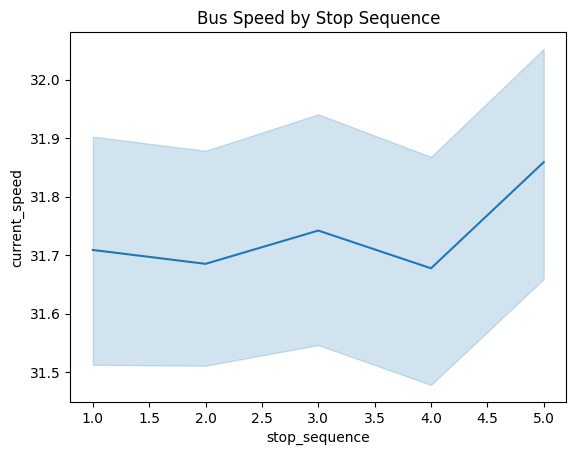

In [13]:
# Stop sequence vs. ETA
sns.lineplot(x='stop_sequence', y='eta_minutes', data=data)
plt.title("ETA by Stop Sequence")
plt.show()

# Stop sequence vs. bus speed
sns.lineplot(x='stop_sequence', y='current_speed', data=data)
plt.title("Bus Speed by Stop Sequence")
plt.show()


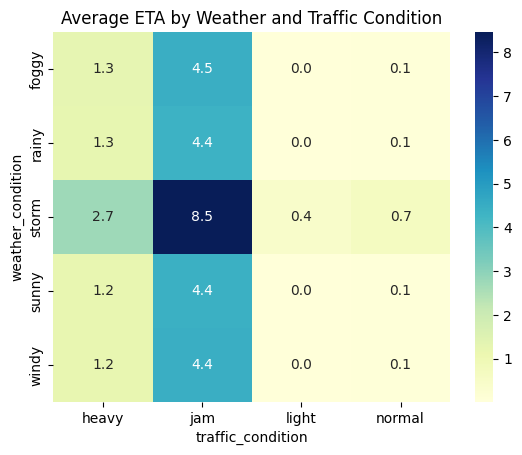

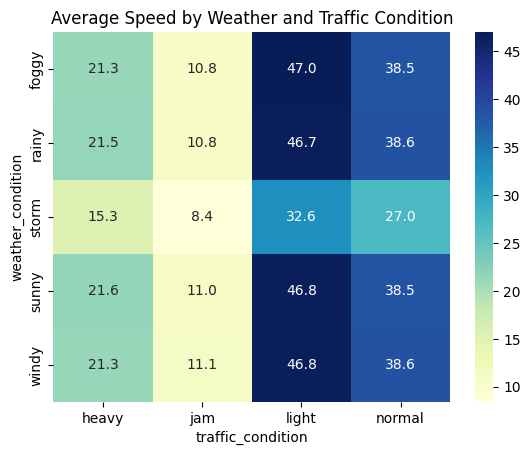

In [14]:
# Weather and traffic condition vs. ETA
weather_traffic_eta = data.groupby(['weather_condition', 'traffic_condition'])['eta_minutes'].mean().unstack()
sns.heatmap(weather_traffic_eta, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average ETA by Weather and Traffic Condition")
plt.show()

# Weather and traffic condition vs. Speed
weather_traffic_speed = data.groupby(['weather_condition', 'traffic_condition'])['current_speed'].mean().unstack()
sns.heatmap(weather_traffic_speed, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Speed by Weather and Traffic Condition")
plt.show()


data cleaning


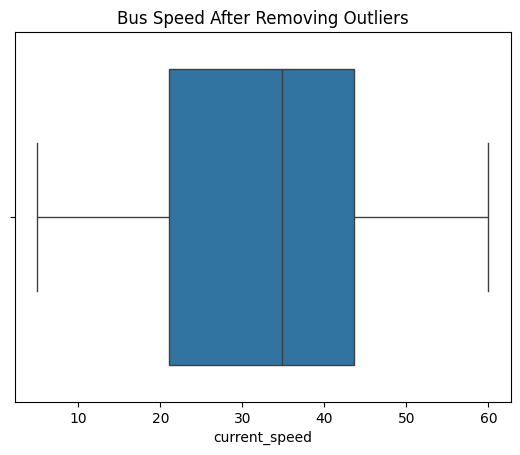

In [15]:
from scipy.stats import zscore

# Calculate Z-scores
data['speed_zscore'] = zscore(data['current_speed'])
data['eta_zscore'] = zscore(data['eta_minutes'])

# Filter out outliers (e.g., Z-score > 3)
df_no_outliers = data[(data['speed_zscore'].abs() <= 3) & (data['eta_zscore'].abs() <= 3)]

# Visualizing outliers
sns.boxplot(x='current_speed', data=df_no_outliers)
plt.title("Bus Speed After Removing Outliers")
plt.show()


In [18]:
import folium

# Check the first few rows of your data
print(data.head())

# Handle missing values if necessary
data = data.dropna(subset=['current_lat', 'current_lon', 'current_stop_name'])

# Create the map centered around the mean of the bus stops
map_center = [data['current_lat'].mean(), data['current_lon'].mean()]
print("Map Center:", map_center)  # Check center coordinates

m = folium.Map(location=map_center, zoom_start=13)

# Plot bus stops on the map
for idx, row in data.iterrows():
    folium.Marker([row['current_lat'], row['current_lon']], popup=f"Stop: {row['current_stop_name']}").add_to(m)

# Display the map inline in Jupyter (if using Jupyter)
m  # In Jupyter, simply calling `m` will display the map inline

# Alternatively, save the map as an HTML file
m.save("bus_stops_map.html")
print("Map saved as bus_stops_map.html")




            timestamp   bus_id route_id  stop_sequence  \
0 2024-01-01 06:00:00  BUS_001     R001              1   
1 2024-01-01 06:05:00  BUS_001     R001              2   
2 2024-01-01 06:10:00  BUS_001     R001              3   
3 2024-01-01 06:17:00  BUS_001     R001              4   
4 2024-01-01 06:23:00  BUS_001     R001              5   

                   current_stop_name                     next_stop_name  \
0                      UTAR bus stop  KJ370 Perumahan SG Long Seksyen 7   
1  KJ370 Perumahan SG Long Seksyen 7                  KJ428 SMK SG Long   
2                  KJ428 SMK SG Long                   Green Acre Condo   
3                   Green Acre Condo                 SG Long Club House   
4                 SG Long Club House                      UTAR bus stop   

   day_of_week  is_holiday  is_peak_hour weather_condition  ...  \
0            0       False         False             sunny  ...   
1            0       False         False             rainy  ...   